In [2]:
import pandas as pd
import seaborn as sbs
import numpy as np
import re


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
head = ['b', 't', 'e', 'm']

In [4]:
df = pd.read_csv('../data/uci_news_aggregator.csv')
pd.set_option('display.max_columns', None)

In [6]:
df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [5]:
ds = df[['TITLE','CATEGORY']]
ds.head(10)

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
5,Plosser: Fed May Have to Accelerate Tapering Pace,b
6,Fed's Plosser: Taper pace may be too slow,b
7,Fed's Plosser expects US unemployment to fall ...,b
8,US jobs growth last month hit by weather:Fed P...,b
9,ECB unlikely to end sterilisation of SMP purch...,b


<Axes: xlabel='CATEGORY', ylabel='count'>

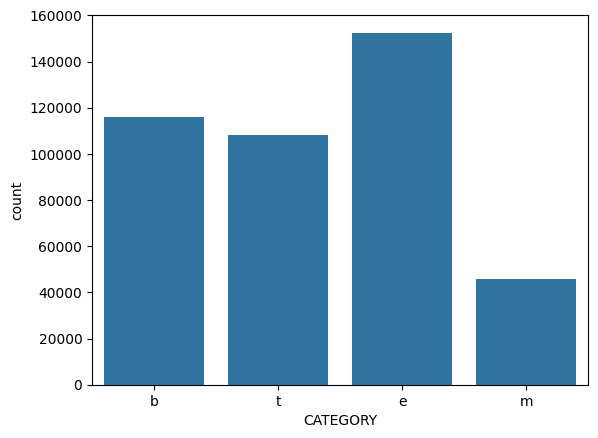

In [8]:
sbs.countplot(x='CATEGORY', data=ds)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/reaksa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [19]:
x = np.array(ds['TITLE'])
x.shape

(422419,)

In [11]:
cleaned = []
for i in range(0,len(ds)):
    
    #removing any other words than (a-z) and (A-Z)
    msg = re.sub('[^a-zA-Z]',' ',  ds['TITLE'][i])
    
    #converting all texts to lower case
    msg = msg.lower()
    
    #tokenizing
    msg = msg.split(' ')
    
    #stemming and removing stopwords
    ps = PorterStemmer()
    msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    cleaned.append(msg)

In [39]:
cont_text = CountVectorizer()
wm =  cont_text.fit_transform(x)
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]


In [14]:
feat_names = cont_text.get_feature_names_out()
feat_names

array(['aa', 'aaa', 'aaaarrrrrghhh', ..., 'zz', 'zzazz', 'zzzzz'],
      dtype=object)

In [15]:
sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)

In [40]:
y = np.array(ds['CATEGORY'])

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test , y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=42)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    ds['TITLE'], ds['CATEGORY'],random_state = 1)

In [65]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [ ]:
print(tfidf_test_vectors)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [64]:
training_data.shape

(316814, 49388)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [67]:
model = DecisionTreeClassifier()
model.fit(tfidf_train_vectors, y_train)

DecisionTreeClassifier()

In [68]:
import matplotlib.pyplot as plt

In [108]:
model.score(tfidf_train_vectors, y_train)

0.9975569261459405

In [75]:
model.predict(tfidf_test_vectors)

array(['b', 'b', 'e', ..., 'b', 'b', 'm'], dtype=object)

In [114]:
print(X_test[1])

Fed's Charles Plosser sees high bar for change in pace of tapering


In [131]:
pred = model.predict(tfidf_test_vectors)
pred[1]

'b'

In [ ]:
pred = model.predict(tfidf_test_vectors)

#saving index of maximum value of pred in preds (because in pred probabilities will come)
preds = []
for i in range(0,len(pred)):
    preds.append(pred[i].argmax())

#saving index of maximum value of y_test in actual
actual = []
for i in range(0,len(y_test)):
    actual.append(y_test[i].argmax())

In [118]:
from sklearn.metrics import classification_report
target = ['Business','Science','Entertainment','Health']
report = classification_report(pred, y_test, target_names=target)
print(report)

               precision    recall  f1-score   support

     Business       0.87      0.86      0.86     29399
      Science       0.93      0.91      0.92     39044
Entertainment       0.82      0.86      0.84     10765
       Health       0.86      0.88      0.87     26397

     accuracy                           0.88    105605
    macro avg       0.87      0.88      0.87    105605
 weighted avg       0.88      0.88      0.88    105605



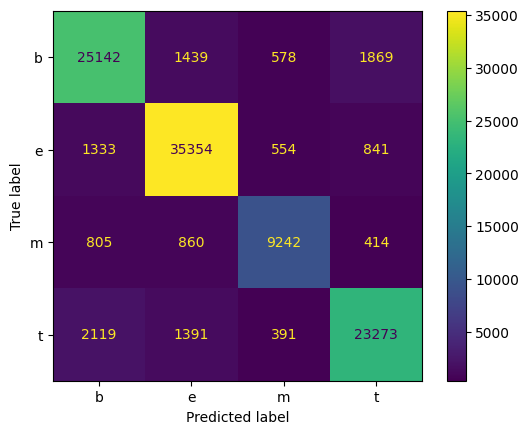

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
rm = confusion_matrix(y_test, pred, labels=model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=rm, display_labels=model.classes_)
dis.plot()

In [86]:
from tensorflow.keras.preprocessing.text import one_hot

2023-12-26 02:33:19.009419: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 02:33:19.564163: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 02:33:19.564591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 02:33:19.665100: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 02:33:19.856001: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 02:33:19.860165: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [90]:
from keras.preprocessing.sequence import pad_sequences

In [128]:
#checking category of a text
txt = ["Elon Musk X, accused of withholding bonuses promised to staff, will have to face a court battle"]

#cleaning and preprocessing the text
cleaned = []
for i in range(0,len(txt)):
    msg = re.sub('[^a-zA-Z]',' ',txt[i])
    msg = msg.lower()
    msg = msg.split()
    ps = PorterStemmer()
    msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    cleaned.append(msg)

#one hot encoding and embedding layer


In [144]:
cleaned

['elon musk x accus withhold bonus promis staff face court battl']

In [129]:
dict_size = 4000
one_hot_mat = [one_hot(words, dict_size) for words in cleaned]
embedded_layer = pad_sequences(one_hot_mat,padding = 'pre', maxlen = 49679)
embedded_layer


array([[   0,    0,    0, ..., 2938, 3477, 2546]], dtype=int32)

In [130]:
#prediction
pred = model.predict(embedded_layer)
cat = ['Business','Science','Entertainment','Health']
print(pred, cat[np.argmax(pred)])

['e'] Business


In [155]:
txt = ["Elon Musk X"]

In [156]:
dict_size = 4000
one_hot_mat = [one_hot(words, dict_size) for words in txt]
embedded_layer = pad_sequences(one_hot_mat,padding = 'pre', maxlen = 49679)
embedded_layer

array([[   0,    0,    0, ..., 2040, 1687, 2186]], dtype=int32)

In [157]:
pred = model.predict(embedded_layer)
cat = ['Science', 'Business','Entertainment','Health']
print(pred)

['e']
